# Data Analysis Basics with Salary Analysis

With data and examples from https://www.kaggle.com/code/bilashalder/salaries-data-analysis-practice/data?select=Salaries.csv

This is an intro to data analysis on Kaggle and an exercise of understanding and exploring data.

In [2]:
import pandas as pd

salaries = pd.read_csv('../input/sf-salary-data-2011-2014/Salaries.csv')

/tmp/ipykernel_634704/2824092596.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv('../input/sf-salary-data-2011-2014/Salaries.csv')


# Get the basic sample and description of the dataset

In [98]:
display(salaries.head())
display(salaries.info())

salaries.describe()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


None

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


# Preprocessing

Convert the null values in the data, assuming the null or no record means 0.

In [10]:
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

for col in cols:
    salaries[col] = salaries[col].apply(lambda x: pd.to_numeric(x, errors='coerce'))

salaries.sample(100)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
69452,69453,Collin Weber,Library Page,7725.33,0.00,0.00,733.57,7725.33,8458.90,2012,NaN,San Francisco,NaN
57174,57175,Alma Canindin,Senior Clerk Typist,56459.61,1681.50,3398.77,29905.42,61539.88,91445.30,2012,NaN,San Francisco,NaN
23103,23104,OREALIS ALVARADO,ACCOUNTANT INTERN,53789.84,547.83,0.00,NaN,54337.67,54337.67,2011,NaN,San Francisco,NaN
28648,28649,MIGUEL TELLEZ,SHERIFF'S CADET,22656.77,1776.13,500.00,NaN,24932.90,24932.90,2011,NaN,San Francisco,NaN
45986,45987,Tiffany Tisen,Attorney (Civil/Criminal),100603.35,0.00,535.80,36729.15,101139.15,137868.30,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42608,42609,Michael Gay,Chief Stationary Engineer,93652.30,27689.40,0.00,39523.15,121341.70,160864.85,2012,NaN,San Francisco,NaN
141897,141898,Shae M Maile,Public Svc Aide-Public Works,18321.49,80.25,0.00,1325.31,18401.74,19727.05,2014,NaN,San Francisco,PT
106351,106352,Helen C Richardson,School Crossing Guard,8812.65,0.00,0.00,0.00,8812.65,8812.65,2013,NaN,San Francisco,NaN
125585,125586,Vladlena Gulchin,Social Work Specialist,82450.40,0.00,680.00,32007.14,83130.40,115137.54,2014,NaN,San Francisco,FT


# Basic Information

In [104]:
salaries.info()

salaries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [105]:
len(salaries['JobTitle'].unique())

2159

# Further Analysis: Distribution, Correlation, etc

<Figure size 3000x1000 with 0 Axes>

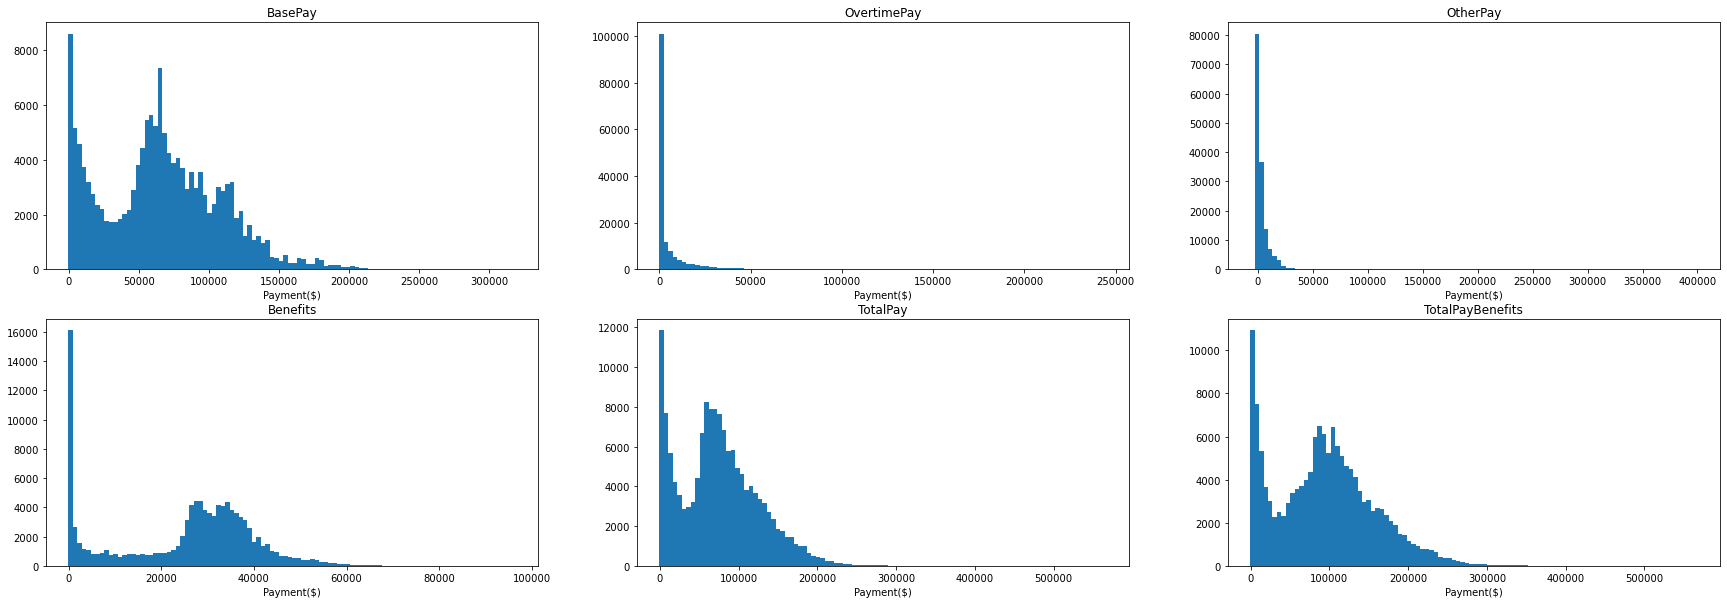

In [120]:
# Explore distribution of data with histogram plots

import matplotlib.pyplot as plt

titles = ('BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits')
nbins = 100
plt.figure(figsize=(30, 10), dpi=100)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

for i, title in enumerate(titles):
    axe = axes[i//3][i%3] 
    
    axe.hist(salaries[title], bins=nbins)
    axe.set_title(title)
    axe.set_xlabel('Payment($)')

plt.show()   


In [7]:
print('The most high paying records')
display(
    salaries.sort_values('TotalPayBenefits', ascending=False).head(20)
)

The most high paying records


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco,NaN
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.0,23236.0,85431.39,336922.01,422353.40,2013,NaN,San Francisco,NaN
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
110536,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.2,71580.48,344187.46,415767.94,2014,NaN,San Francisco,FT


In [20]:
print('The most high paying benefits, from totalpaybenefits - basepay')

benefits = salaries.loc[:, ('Id', 'EmployeeName', 'JobTitle')]
benefits['Benefits'] = salaries['TotalPayBenefits']-salaries['BasePay']

display(
    benefits.sort_values('Benefits', ascending=False).head(20)
)

The most high paying benefits, from totalpaybenefits - basepay


,Id,EmployeeName,JobTitle,Benefits
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,400184.25
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),382943.26
110531,110532,David Shinn,Deputy Chief 3,381582.67
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",278465.91
36161,36162,Khoa Trinh,Electronic Maintenance Tech,277575.02
36167,36168,John Goldberg,Captain 3,270286.64
36174,36175,Leda Rozier,Transit Manager 2,261236.74
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,254779.92
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,254427.61
72964,72965,Whitney P Yee,Deputy Sheriff,249437.33


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
BasePay,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595
OvertimePay,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981
OtherPay,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341
Benefits,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140
TotalPay,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313
TotalPayBenefits,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000


<AxesSubplot:>

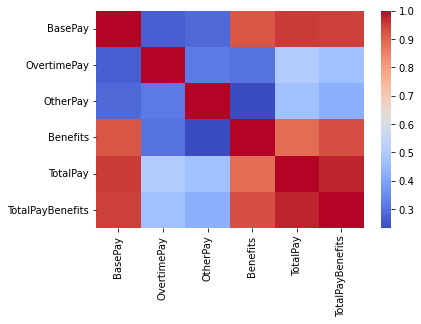

In [26]:
# make correlation heatmap, displays the correlation among different types of payment

import matplotlib.pyplot as plt
import seaborn as sns

payments = salaries.loc[:, ('BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits')]
corr_matrix = payments.corr()

display(corr_matrix)

sns.heatmap(corr_matrix, cmap='coolwarm')

In [32]:
print('Find the best and least paying job titles on average')

title_payments = salaries[['JobTitle', 'TotalPayBenefits']]
mean_title_payments = title_payments.groupby(by='JobTitle').mean()

print('Find the best paying job titles')
display(
    mean_title_payments.sort_values('TotalPayBenefits', ascending=False).head(20)
)

print('Find the least paying job titles')
display(
    mean_title_payments.sort_values('TotalPayBenefits', ascending=True).head(20)
)

Find the best and least paying job titles on average
Find the best paying job titles


,TotalPayBenefits
JobTitle,
Chief Investment Officer,436224.360000
Chief of Police,411732.266667
"Chief, Fire Department",408865.326667
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
"Gen Mgr, Public Trnsp Dept",380696.440000
"Dep Dir for Investments, Ret",355731.260000
Mayor,354212.906667
"Adm, SFGH Medical Center",347079.706667
Controller,343061.140000


Find the least paying job titles


,TotalPayBenefits
JobTitle,
Not provided,0.000000
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,149.510000
"BOARD/COMMISSION MEMBER, GROUP II",296.511628
"BdComm Mbr, Grp2,M=$25/Mtg",475.047742
"BOARD/COMMISSION MEMBER, GROUP III",638.787879
SPECIAL ASSISTANT XIV,673.800000
"BdComm Mbr, Grp3,M=$50/Mtg",973.106034
"BOARD/COMMISSION MEMBER, GROUP V",1195.904464
SPECIAL EXAMINER,1201.260000
